In [25]:
pip install matplotlib

  Using cached contourpy-1.2.0-cp310-cp310-win_amd64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/162.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/162.6 kB ? eta -:--:--
     --------- ----------------------------- 41.0/162.6 kB 1.9 MB/s eta 0:00:01
     --------- ----------------------------- 41.0/162.6 kB 1.9 MB/s eta 0:00:01
     --------- ----------------------------- 41.0/162.6 kB 1.9 MB/s eta 0:00:01
     --------- ----------------------------- 41.0/162.6 kB 1.9 MB/s eta 0:00:01
     --------- ----------------------------- 41.0/162.6 kB 1.9 MB/s eta 0:00:01
     --------- ----------------------------- 41.0/162.6 kB 1.9 MB/s eta 0:00:01
     -------------------- ---------------- 92.2/162.6 kB 168.9 kB/s eta 0:00:01
     -------------------- ---------------- 92.2/162.6 kB 168.9 kB/s eta 0:00:01
     -------------------- ---------------- 92.2/162.6 kB 168.9 kB/s eta 0:0

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [1]:
import pandas as pd
import zipfile

C:\Users\kiokh\AppData\Local\Temp\ipykernel_12668\1290024744.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
    zip_ref.extractall('archive')

In [6]:
unemployment_data_india = pd.read_csv('archive/Unemployment in India.csv')
upto_2020_data=pd.read_csv('archive/Unemployment_Rate_upto_11_2020.csv')

In [7]:
unemployment_data_india.head()


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [8]:
upto_2020_data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [10]:
unemployment_data_india.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [11]:
upto_2020_data.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [14]:
merged_dataset=pd.merge(unemployment_data_india,upto_2020_data,on=['Region',' Date'],how='inner')

In [15]:
merged_dataset.head()

,Region,Date,Frequency_x,Estimated Unemployment Rate (%)_x,Estimated Employed_x,Estimated Labour Participation Rate (%)_x,Area,Frequency_y,Estimated Unemployment Rate (%)_y,Estimated Employed_y,Estimated Labour Participation Rate (%)_y,Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,Monthly,4.84,12016676.0,43.46,Rural,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,Monthly,5.91,11723617.0,42.83,Rural,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,Monthly,4.06,11359660.0,40.66,Rural,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,Monthly,16.29,8792827.0,36.03,Rural,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,Monthly,14.46,9526902.0,38.16,Rural,M,17.43,12988845,36.46,South,15.9129,79.74


In [27]:
merged_dataset.columns

Index(['Region', ' Date', ' Frequency_x', ' Estimated Unemployment Rate (%)_x',
       ' Estimated Employed_x', ' Estimated Labour Participation Rate (%)_x',
       'Area', ' Frequency_y', ' Estimated Unemployment Rate (%)_y',
       ' Estimated Employed_y', ' Estimated Labour Participation Rate (%)_y',
       'Region.1', 'longitude', 'latitude', 'Year', 'Month'],
      dtype='object')

In [16]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 14 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Region                                      306 non-null    object 
 1    Date                                       306 non-null    object 
 2    Frequency_x                                306 non-null    object 
 3    Estimated Unemployment Rate (%)_x          306 non-null    float64
 4    Estimated Employed_x                       306 non-null    float64
 5    Estimated Labour Participation Rate (%)_x  306 non-null    float64
 6   Area                                        306 non-null    object 
 7    Frequency_y                                306 non-null    object 
 8    Estimated Unemployment Rate (%)_y          306 non-null    float64
 9    Estimated Employed_y                       306 non-null    int64  
 10   Estimated Lab

In [17]:
merged_dataset.isnull().sum()

Region                                        0
 Date                                         0
 Frequency_x                                  0
 Estimated Unemployment Rate (%)_x            0
 Estimated Employed_x                         0
 Estimated Labour Participation Rate (%)_x    0
Area                                          0
 Frequency_y                                  0
 Estimated Unemployment Rate (%)_y            0
 Estimated Employed_y                         0
 Estimated Labour Participation Rate (%)_y    0
Region.1                                      0
longitude                                     0
latitude                                      0
dtype: int64

In [18]:
# Preprocessing the data (handle missing values, convert data types, etc.)
# For example:
merged_dataset.dropna(inplace=True)  # Drop rows with missing values

In [21]:
merged_df=merged_dataset

In [22]:
merged_df['Year'] = pd.to_datetime(merged_df[' Date']).dt.year
merged_df['Month'] = pd.to_datetime(merged_df[' Date']).dt.month

C:\Users\kiokh\AppData\Local\Temp\ipykernel_12668\3608345506.py:1: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  merged_df['Year'] = pd.to_datetime(merged_df[' Date']).dt.year
C:\Users\kiokh\AppData\Local\Temp\ipykernel_12668\3608345506.py:2: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  merged_df['Month'] = pd.to_datetime(merged_df[' Date']).dt.month


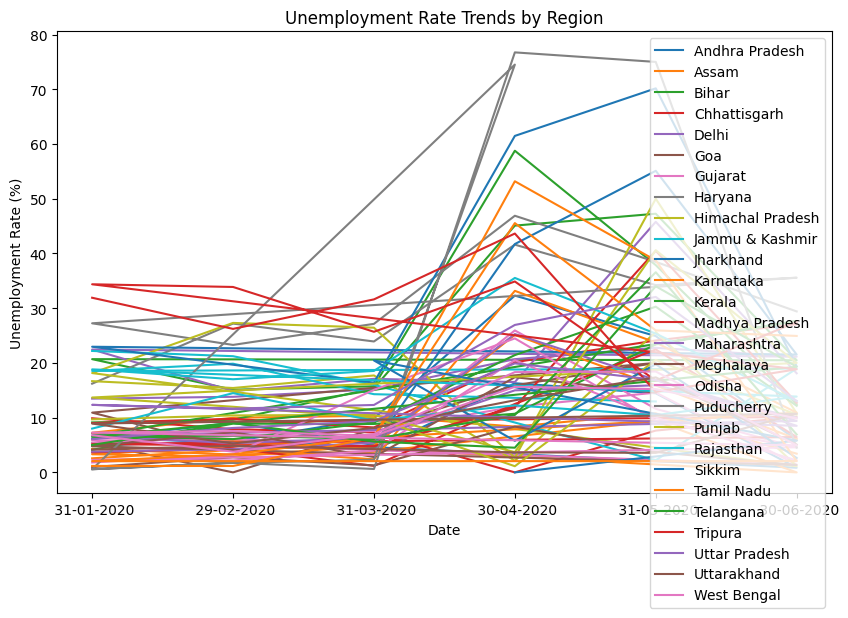

In [28]:
import matplotlib.pyplot as plt

# Plot unemployment rate trends over time
plt.figure(figsize=(10, 6))
for region, data in merged_df.groupby('Region'):
    plt.plot(data[' Date'], data[' Estimated Unemployment Rate (%)_x'], label=region)
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.title('Unemployment Rate Trends by Region')
plt.legend()
plt.show()

In [29]:
# Statistical analysis
print(merged_df.describe())

        Estimated Unemployment Rate (%)_x   Estimated Employed_x  \
count                          306.000000           3.060000e+02   
mean                            15.085523           6.987533e+06   
std                             13.623182           7.869803e+06   
min                              0.000000           4.942000e+04   
25%                              5.380000           1.445030e+06   
50%                             10.740000           4.574052e+06   
75%                             20.370000           1.074515e+07   
max                             76.740000           4.577751e+07   

        Estimated Labour Participation Rate (%)_x  \
count                                  306.000000   
mean                                    40.923856   
std                                      8.800755   
min                                     13.330000   
25%                                     36.382500   
50%                                     39.530000   
75%             

In [33]:
merged_dataset.columns

Index(['Region', ' Date', ' Frequency_x', ' Estimated Unemployment Rate (%)_x',
       ' Estimated Employed_x', ' Estimated Labour Participation Rate (%)_x',
       'Area', ' Frequency_y', ' Estimated Unemployment Rate (%)_y',
       ' Estimated Employed_y', ' Estimated Labour Participation Rate (%)_y',
       'Region.1', 'longitude', 'latitude', 'Year', 'Month'],
      dtype='object')

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Split data into features and target variable
X = merged_df[[' Estimated Employed_x', ' Estimated Labour Participation Rate (%)_x', 'Year', 'Month']]
y = merged_df[' Estimated Unemployment Rate (%)_y']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 294.29232189937477
